In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import binomtest,chisquare,ttest_1samp,ttest_ind,f_oneway,pearsonr

# Exercice 1 HEALTHEXP

In [2]:
df =sns.load_dataset("healthexp")
df.to_csv("test.csv")
df.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


In [3]:
df.columns


Index(['Year', 'Country', 'Spending_USD', 'Life_Expectancy'], dtype='object')

In [4]:
alpha = 0.02
df_usa = df.query("`Country`=='USA'  & 2000 <= `Year` <= 2020 ")

p_value = pearsonr(df_usa['Spending_USD'],df_usa['Life_Expectancy']).pvalue

if p_value < alpha:
    print("nous avons suffisament d'hypothese pour rejetter H0")
else:
    print("nous n'avons pas suffisament d'hypothese pour rejetter H0")

1/p_value

nous avons suffisament d'hypothese pour rejetter H0


np.float64(376.20085939544)

In [5]:
pearsonr(df_usa['Spending_USD'],df_usa['Life_Expectancy'])

PearsonRResult(statistic=np.float64(0.6210674528998253), pvalue=np.float64(0.002658154480579906))

<Axes: xlabel='Spending_USD', ylabel='Life_Expectancy'>

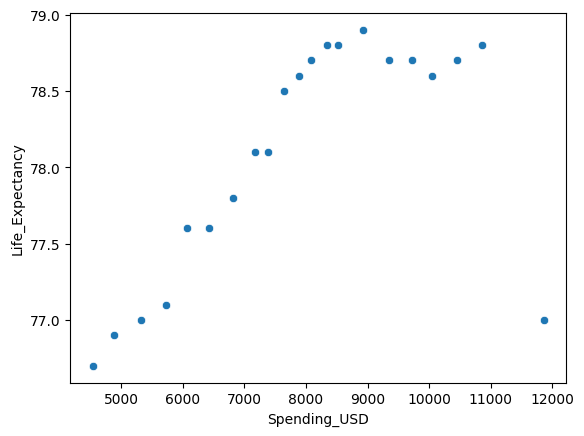

In [6]:
sns.scatterplot(data=df_usa,x="Spending_USD",y='Life_Expectancy')

In [7]:
df.groupby('Country')['Life_Expectancy'].describe()


,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Canada,44.0,78.706818,2.502222,72.8,76.775,78.7,80.975,82.2
France,35.0,79.565714,2.862120,72.2,78.050,79.4,82.200,82.9
Germany,50.0,76.726000,3.473915,70.6,73.575,77.1,80.175,81.3
Great Britain,43.0,77.620930,2.827548,71.9,75.350,77.5,80.400,81.4
Japan,51.0,79.554902,3.547242,72.0,76.950,79.8,82.650,84.7
USA,51.0,75.843137,2.336258,70.9,74.550,75.7,77.950,78.9


In [8]:
alpha = 0.02
df_all = df.query("`Country`=='Germany' & 1970>=`Year`<=2020")
df_ang = df.query("`Country`=='Great Britain' & 1970>=`Year`<=2020")

p_value  = ttest_ind(df_all['Life_Expectancy'],df_ang['Life_Expectancy']).pvalue

if p_value < alpha:
    print("nous avons suffisament d'hypothese pour rejetter H0")
else:
    print("nous n'avons pas suffisament d'hypothese pour rejetter H0")

print("il sont correle on n'a pas assez dhypothese")



nous n'avons pas suffisament d'hypothese pour rejetter H0
il sont correle on n'a pas assez dhypothese


/home/romaric420/Analyse/.venv/lib/python3.12/site-packages/scipy/stats/_stats_py.py:6316: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


In [9]:
df

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9
...,...,...,...,...
269,2020,Germany,6938.983,81.1
270,2020,France,5468.418,82.3
271,2020,Great Britain,5018.700,80.4
272,2020,Japan,4665.641,84.7


# Exercice 2 MPG

In [10]:
df = sns.load_dataset("mpg")

In [11]:
df.dropna(inplace=True)
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [13]:
df.groupby("horsepower")['mpg'].describe()

,count,mean,std,min,25%,50%,75%,max
horsepower,,,,,,,,
46.0,2.0,26.000000,0.000000,26.0,26.00,26.0,26.00,26.0
48.0,3.0,43.600000,0.624500,43.1,43.25,43.4,43.85,44.3
49.0,1.0,29.000000,NaN,29.0,29.00,29.0,29.00,29.0
52.0,4.0,34.200000,6.715157,29.0,30.50,31.9,35.60,44.0
53.0,2.0,33.000000,0.000000,33.0,33.00,33.0,33.00,33.0
...,...,...,...,...,...,...,...,...
210.0,1.0,11.000000,NaN,11.0,11.00,11.0,11.00,11.0
215.0,3.0,12.333333,2.081666,10.0,11.50,13.0,13.50,14.0
220.0,1.0,14.000000,NaN,14.0,14.00,14.0,14.00,14.0


horsepower
46.0     Axes(0.125,0.11;0.775x0.77)
48.0     Axes(0.125,0.11;0.775x0.77)
49.0     Axes(0.125,0.11;0.775x0.77)
52.0     Axes(0.125,0.11;0.775x0.77)
53.0     Axes(0.125,0.11;0.775x0.77)
                    ...             
210.0    Axes(0.125,0.11;0.775x0.77)
215.0    Axes(0.125,0.11;0.775x0.77)
220.0    Axes(0.125,0.11;0.775x0.77)
225.0    Axes(0.125,0.11;0.775x0.77)
230.0    Axes(0.125,0.11;0.775x0.77)
Name: mpg, Length: 93, dtype: object

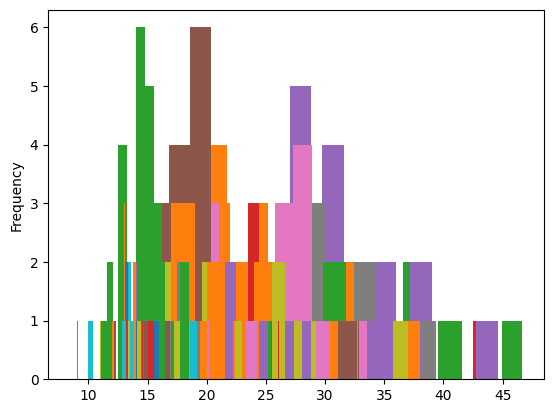

In [14]:
df.groupby("horsepower")['mpg'].plot(kind='hist')

<Axes: xlabel='horsepower', ylabel='mpg'>

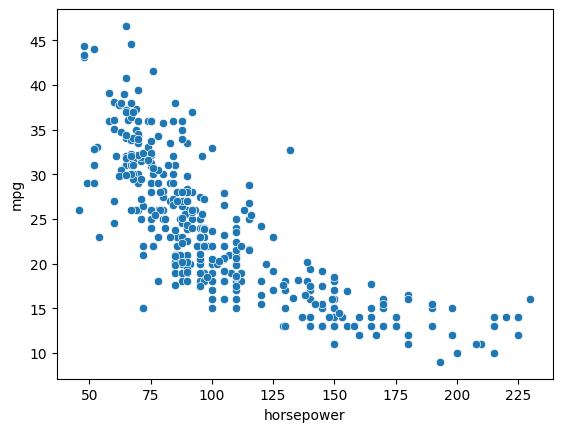

In [15]:
sns.scatterplot(data=df,x='horsepower',y='mpg')

In [16]:
from scipy.stats import pearsonr

alpha = 0.02

p_value  = pearsonr(df['horsepower'],df['mpg']).pvalue

if p_value < alpha:
    print("on a assez dhypothese pour rejette H0")
else:
    print("nous n'avons pas assez d'hypothese pour rejetter H0")

on a assez dhypothese pour rejette H0


In [17]:

pearsonr(x=df['horsepower'],y=df['mpg'])

PearsonRResult(statistic=np.float64(-0.7784267838977759), pvalue=np.float64(7.031989029404787e-81))

In [18]:
#question 2



In [19]:
df.head(
)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [20]:
#question 3
alpha = 0.02
usa_car4 = df.query("`origin`== 'usa' & `model_year`<=80 & `cylinders`==4")
usa_car6 = df.query("`origin`== 'usa' & `model_year`<=80 & `cylinders`==6")

p_value =ttest_ind(usa_car4['acceleration'],usa_car6['acceleration']).pvalue

if p_value < alpha:
    print("Nous rejetons l'hypothèse H0")
else:
    print("Nous ne rejetons pas l'hypothèse H0 ")


Nous ne rejetons pas l'hypothèse H0 


In [21]:
#question 4
df.head()

df_ford=df[df['name'].str.contains("ford")]

df_ford["cylinders"].value_counts(normalize=True)


cylinders
8    0.416667
4    0.333333
6    0.250000
Name: proportion, dtype: float64

In [22]:
datas = sns.get_dataset_names()
for names in datas:
    print(datas)

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']
['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']
['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']
['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']
['anagrams', 'anscombe', 'attention'